In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. Generate random integer numbers of a given shape. From random generators you can use only np.random.rand()

In [2]:
def generate_rand_int_for_shape(*args):
    rand_matrix = np.random.rand(*args)
    shape = rand_matrix.shape
    rand_matrix = rand_matrix.reshape(-1)
    rand_matrix = np.array([int(str(item).split("0.")[1]) for item in rand_matrix])

    return rand_matrix.reshape(shape)

In [3]:
generate_rand_int_for_shape(2, 3)

array([[6555690791151314, 7870391362362439, 6920117995700258],
       [3681459509261067,  669658480462749, 2129985137050827]])

2. Find unique values of the given numpy array.

In [4]:
def get_unique_values1(arr:np.ndarray):
    arr = arr.reshape(-1)
    unique_values = []
    non_unique_values = []

    for item in arr:
        if item in unique_values:
            unique_values.remove(item)
            non_unique_values.append(item)
        else:
            if not item in non_unique_values:
                unique_values.append(item)

    return unique_values

def get_unique_values(arr:np.ndarray):
    arr = arr.reshape(-1)
    items_and_occurrences = {}

    for item in arr:
        if item not in items_and_occurrences.keys():
            items_and_occurrences.update({item: 1})
        else:
            items_and_occurrences[item] += 1

    return [el for el in items_and_occurrences.keys() if items_and_occurrences[el] == 1]

In [5]:
np_arr = np.array([[78, 67, 95, 24], [78, 14, 78, 56], [44, 16, 78, 67]])
get_unique_values(np_arr)

[95, 24, 14, 56, 44, 16]

3. Find value of derivative of a function of 1 variable in given point. The function can be only polynomial and is given by string. For example func('3x^2+4x+4', 3) == 22 (for your ease - lets limit coefficients to be only integers)


In [6]:
def derivative_of_polynomial(polynomial:str, point:int):
    polynomial = polynomial.split()
    polynomial = "".join(polynomial)
    polynomial = polynomial.split("-")
    # the first element is either an empty list or a polynomial item with plus sign
    polynomial = ["-" + item if not item == polynomial[0] else item for item in polynomial if item]

    i = 0
    while True:
        len_polynomial = len(polynomial)

        polynomial[i:i+1] = polynomial[i].split("+")
        i += len(polynomial) - len_polynomial + 1

        if i == len(polynomial):
            break

    result = 0
    for item in polynomial:
        coef_degree = item.split("x^")
        if len(coef_degree) == 1:
            coef_degree = item.split("x")

        if len(coef_degree) != 2:
            continue

        coef_degree = [int(val) if val else 1 for val in coef_degree]
        result += coef_degree[0] * coef_degree[1] * pow(point, coef_degree[1] - 1)

    return result


In [7]:
# function = '-3x^2+4x-4 + 2x + 5'
function = '3x^2+4x+4'
derivative_of_polynomial(function, 3)

22

4. From which known distribution is np.random.rand() ? Get 2 different arrays generated from that distribution and get their difference. What should the mean of that difference be, if we get a bigger sample size? Think about this answer before calculating it with code.

### np.random.rand() is from a Uniform[0,1) distribution
### E[X - Y] = E[X] - E[Y] = 1/2 - 1/2 = 0
### Both $\{a_k\}_1^n, \{a_k\}_1^n$ sequences approach the interval over [0, 1)

### $\sum_{n=1}^{\infty} \frac {a_n - b_n}{n} = 0$

### So on  a bigger sample it approaches to zero.

In [8]:
size = 10000000
X = np.random.rand(size)
Y = np.random.rand(size)
np.mean(X - Y)

-0.00027968146891942217

5. Replace random values (~10 % of values) of car data.csv with np.nan; Then fill that nan values with most common values of the column for categorical columns and with mean values from numerical columns.


In [12]:
df = pd.read_csv("car data.csv")

In [18]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [19]:
max_iter = df.shape[0] * df.shape[1] // 10 + 1
random_rows = np.random.choice(df.shape[0], max_iter)
random_columns = np.random.choice(df.shape[1], max_iter)

for i in range(max_iter):
    df.loc[random_rows[i], df.columns[random_columns[i]]] = np.nan

In [20]:
for i in range(len(df.dtypes)):
    if df.dtypes[i] != object:
        df[df.columns[i]].replace({np.nan: df[df.columns[i]].mean()}, inplace=True)
    else:
        df[df.columns[i]].replace({np.nan: df[df.columns[i]].mode()[0]}, inplace=True)

In [21]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.350000,5.59,27000.000000,Petrol,Dealer,Manual,0.000000
1,sx4,2013.0,4.750000,9.54,43000.000000,Diesel,Dealer,Manual,0.000000
2,ciaz,2017.0,7.250000,9.85,6900.000000,Petrol,Dealer,Manual,0.044444
3,wagon r,2011.0,2.850000,4.15,35802.118959,Petrol,Dealer,Manual,0.000000
4,swift,2014.0,4.600000,6.87,42450.000000,Diesel,Dealer,Manual,0.044444
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,4.515985,11.60,33988.000000,Diesel,Dealer,Manual,0.000000
297,brio,2015.0,4.000000,5.90,60000.000000,Petrol,Dealer,Manual,0.000000
298,city,2009.0,3.350000,11.00,87934.000000,Petrol,Dealer,Manual,0.000000
299,city,2017.0,11.500000,12.50,9000.000000,Diesel,Dealer,Manual,0.000000


6. Plot graphics of functions x^2 and sin(x) in the same figure. Make one of them regular plot and the other one with dashed lines.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

x = np.arange(-10, 11) / 2
x_square = x ** 2
sin_x = np.sin(x)

ax.plot(x, x_square, "--")
ax.plot(x, sin_x)

ax.set_title(label="Figures of $x^2$ and $\sinx$")

7. Scatter plot data points from car data.csv using selling price and present price as data point coordinates. Differentiate the points by colors, each color corresponds to a unique fuel type (e.g., all Petrols are blue and all Diesels are red). Add a legend for each color.

In [24]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

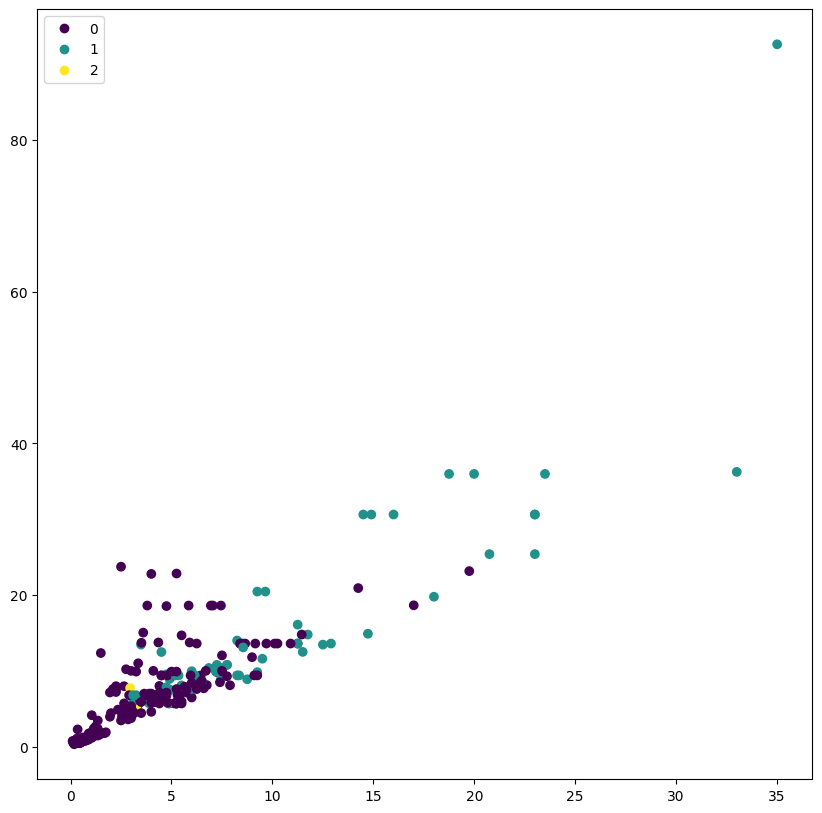

In [23]:
df = pd.read_csv("car data.csv")

uniques = df.Fuel_Type.unique()
colors = df.Fuel_Type.copy()

for index, u in enumerate(uniques):
    colors.replace({u: index}, inplace=True)

plt.figure(figsize=(10,10))
scatter = plt.scatter(df.Selling_Price, df.Present_Price, c=colors)
plt.legend(*scatter.legend_elements(), loc="upper left")